In [1]:
# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [2]:
AD21 = gpd.read_file('AD21.geojson')

In [3]:
AD21.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 142 columns):
 #    Column                       Dtype              
---   ------                       -----              
 0    OBJECTID_1                   float64            
 1    AIN                          object             
 2    APN                          object             
 3    SitusHouse                   object             
 4    SitusFract                   object             
 5    SitusDirec                   object             
 6    SitusUnit                    object             
 7    SitusStree                   object             
 8    SitusAddre                   object             
 9    SitusCity                    object             
 10   SitusZIP                     object             
 11   SitusFullA                   object             
 12   TaxRateAre                   object             
 13   TaxRateCit                   object             
 14 

In [4]:
columns_to_keep = ['SitusAddre','UseType', 'UseDescrip', 'geometry']

In [5]:
AD21_clipped = AD21[columns_to_keep]

In [6]:
AD21_clipped.head()

SitusAddre      UseType           UseDescrip  \
0          999 N BROADWAY   Commercial       Hotel & Motels   
1  918 W COLLEGE ST   317  Residential               Single   
2            908 AVILA ST   Industrial  Heavy Manufacturing   
3    716 NEW DEPOT ST   A  Residential               Single   
4           734 N HILL PL  Residential            Two Units   

                                            geometry  
0  POLYGON Z ((-118.23615 34.06662 0.00000, -118....  
1  POLYGON Z ((-118.24515 34.06608 0.00000, -118....  
2  POLYGON Z ((-118.23247 34.05774 0.00000, -118....  
3  POLYGON Z ((-118.24270 34.06474 0.00000, -118....  
4  POLYGON Z ((-118.24245 34.06255 0.00000, -118....

In [7]:
building_counts = AD21_clipped.value_counts(['UseType']).reset_index(name="count")
building_counts

UseType  count
0    Residential    612
1     Commercial    347
2     Industrial    133
3     Government     49
4  Miscellaneous     40
5  Institutional     14
6   Recreational     10

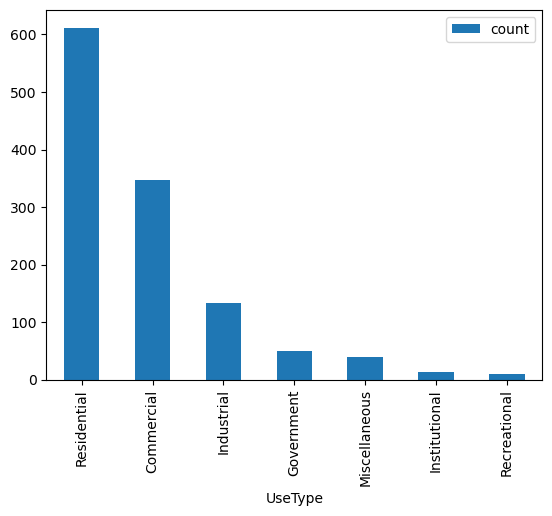

In [8]:
building_counts.plot.bar(x='UseType');

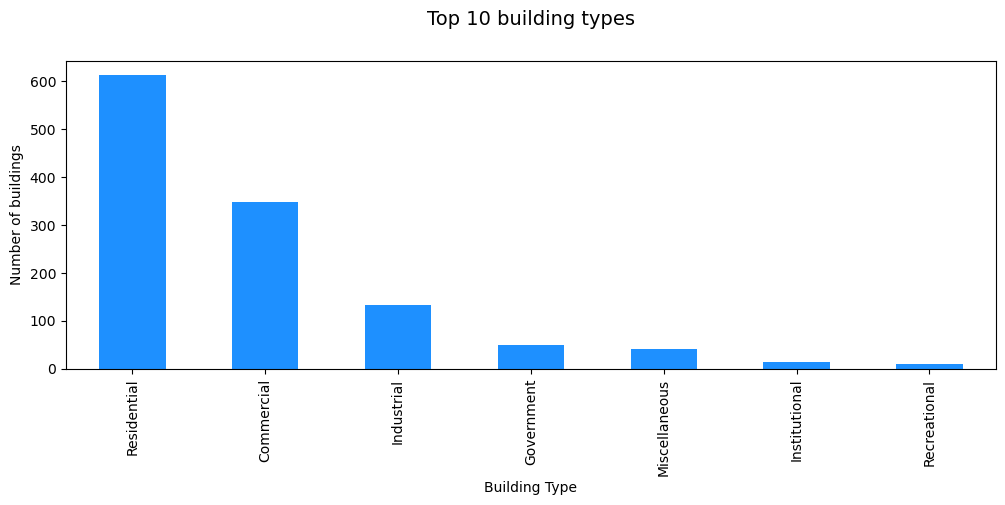

In [9]:
fig, ax = plt.subplots(figsize=(12,4))

building_counts[:10].plot.bar(ax=ax,
                                      x='UseType',
                                      y='count',
                                      legend=False,
                                      color='dodgerblue'
                                      )
ax.set_xlabel('Building Type') # override x label
ax.set_ylabel('Number of buildings') # override y label
ax.set_title("Top 10 building types\n",fontsize=14,pad=10); # multi-line title with paddin

In [10]:
import plotly.io as pio
pio.templates.default = "plotly_white"

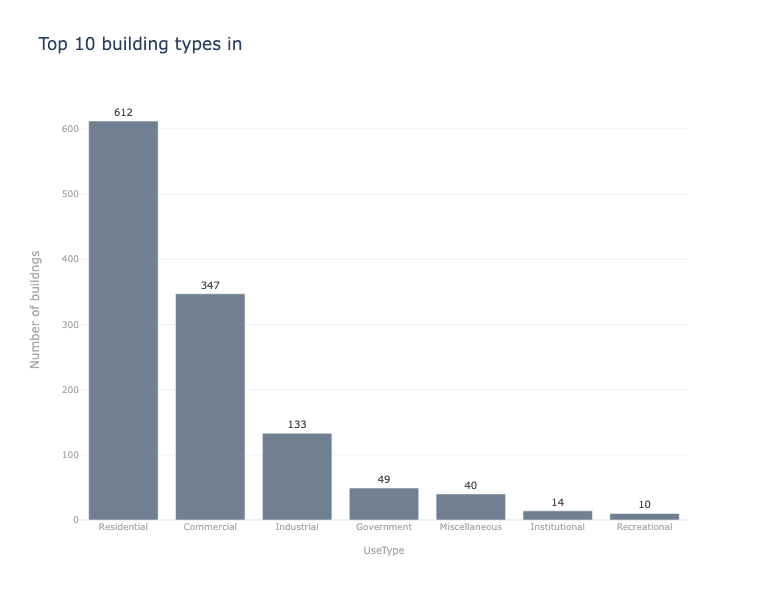

In [11]:
# bar chart
fig = px.bar(building_counts.head(10),
        x='UseType',
        y='count',
        title="Top 10 building types in ", # title
        text_auto = True,
        height=600,
        width=900,
        color_discrete_sequence =['slategray']*len(building_counts), # single color for all the bars
        labels={
                'count': 'Number of buildngs',
                'building': 'Type of building',
        })

# bar label
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# axes labels
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
fig.show()

<AxesSubplot: >

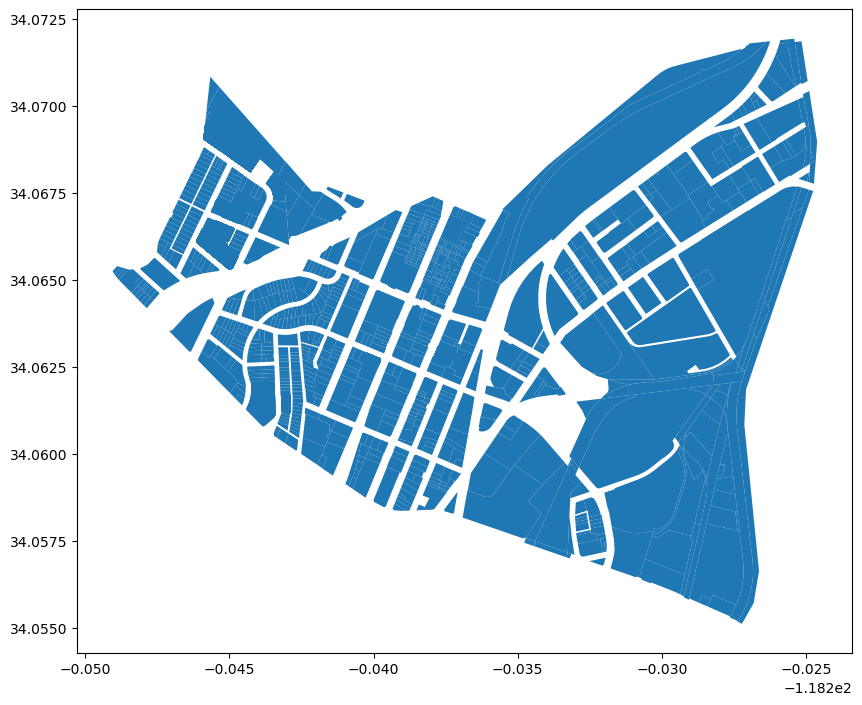

In [12]:
AD21_clipped.plot(figsize=(10,10))

<AxesSubplot: >

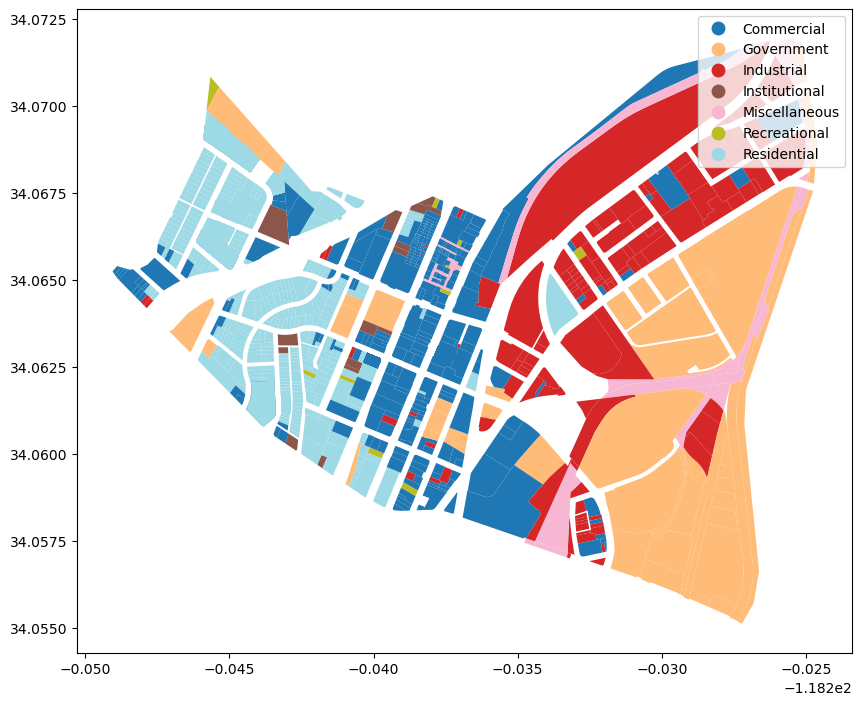

In [13]:
AD21_clipped.plot(figsize=(10,10),
         column='UseType',
         cmap='tab20',
         legend=True)

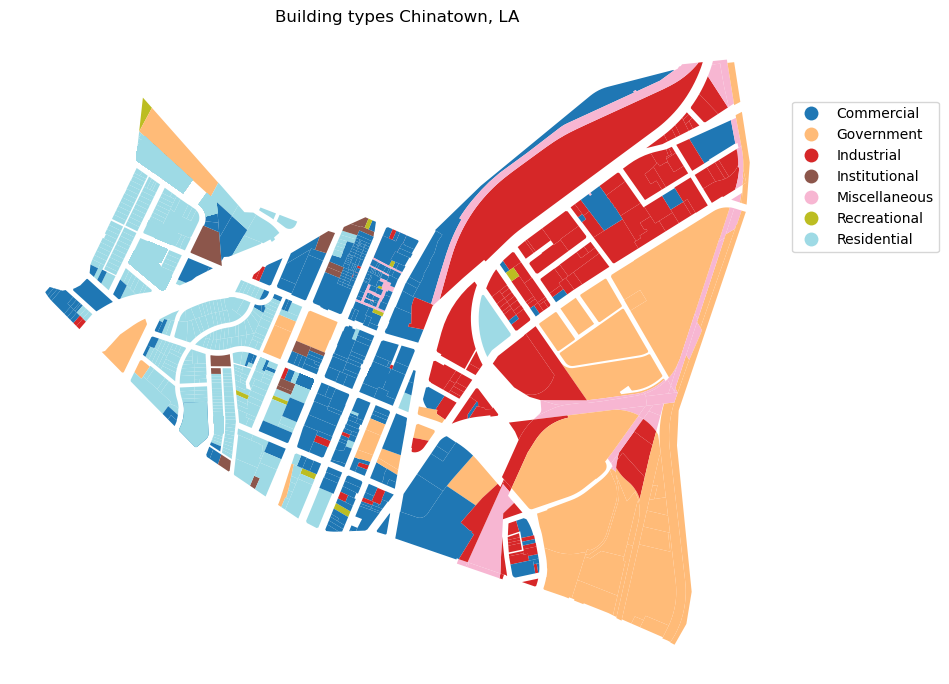

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
AD21_clipped.plot(ax=ax,
         column='UseType',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Building types Chinatown, LA')

# get rid of the axis
ax.axis('off');

In [16]:
# get min/max bounds of lat/lon
minx = AD21_clipped.total_bounds[0]
miny = AD21_clipped.total_bounds[1]
maxx = AD21_clipped.total_bounds[2]
maxy = AD21_clipped.total_bounds[3]

In [17]:
buildingtypes = AD21_clipped['UseType'].unique().tolist()
buildingtypes

['Commercial',
 'Residential',
 'Industrial',
 'Miscellaneous',
 'Government',
 'Institutional',
 'Recreational',
 None]

/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.



TypeError: can only concatenate str (not "NoneType") to str

Error in callback <function _draw_all_if_interactive at 0x7f843d3d9870> (for post_execute):


ValueError: cannot convert float NaN to integer

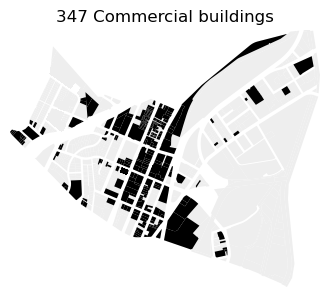

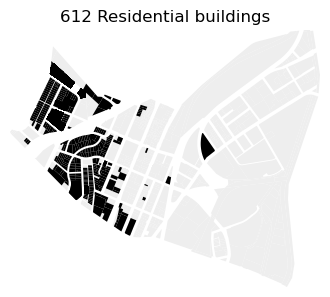

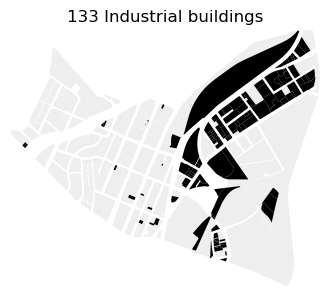

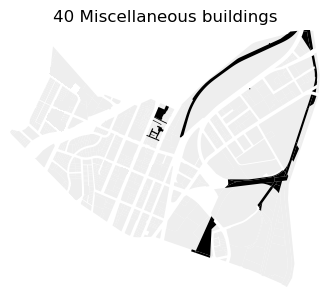

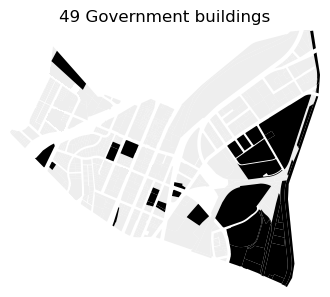

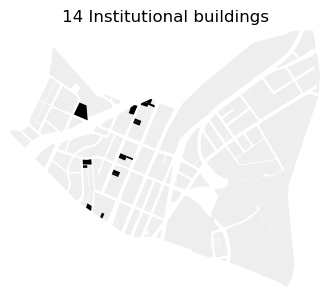

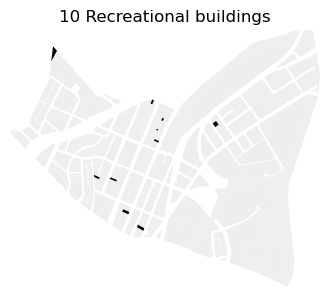

ValueError: cannot convert float NaN to integer

<Figure size 400x400 with 1 Axes>

In [18]:
# loop through building types
for type in buildingtypes:
    fig, ax = plt.subplots(figsize=(4,4))

    # create the map plot
    AD21_clipped.plot(ax=ax,
            # column='building',
            color='#eee')

    # create the map plot
    AD21_clipped[AD21_clipped['UseType'] == type].plot(ax=ax,
            # column='building',
            color='black')

    # set the extent of the map 
    # so that each map has the same bounds
    ax.set_xlim((minx,maxx))
    ax.set_ylim((miny,maxy))

    # add a title
    number_of_buildings = len(AD21_clipped[AD21_clipped['UseType']==type])
    ax.set_title(str(number_of_buildings) + ' ' + type + ' buildings')

    # get rid of the axis
    ax.axis('off');